In [10]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [2]:
def get_nbhd_proportion(grid, row, col, radius, target_number):
    """target_number is the group I want to get the proportion of, so if I set this to 2 it will tell me the proportion of twos around me.
    Returns 0 if the neighbourhood is completely empty (maybe change?)."""
    m, n = grid.shape
    num_in_nbhd = 0
    num_target_colour = 0
    
    # be careful with edges
    row_min = max(row - radius, 0)
    row_max = min(row + radius, m-1)
    col_min = max(col - radius, 0)
    col_max = min(col + radius, n-1)

    for r in range(row_min, row_max + 1):
        for c in range(col_min, col_max + 1):
            if grid[r,c] != 0:
                num_in_nbhd += 1
                if grid[r,c] == target_number:
                    num_target_colour += 1

    if num_in_nbhd != 0:
        return num_target_colour / num_in_nbhd
    else:
        return 0
    

In [ ]:
def other_colour(x):
    if x == 1:
        return 2
    elif x == 2:
        return 1
    else:
        return None

In [34]:
def one_step(housing_grid, tolerances, radius):
    """housing_grid is changed in place so we don't return anything."""
    m, n = housing_grid.shape
    discontents = []

    # step 1: find discontents
    for r in range(m):
        for c in range(n):
            current_colour = housing_grid[r,c]
            if current_colour in [1,2]:
                prop_mycolour = get_nbhd_proportion(housing_grid, r, c, radius, current_colour)
                if prop_mycolour < tolerances[current_colour]: discontents.append([r,c,current_colour])

    # step 2: try and move the discontents
    for i, agent in enumerate(discontents):
        # check if they're still discontent (necessary for everyone after the first)
        still_discontent = (get_nbhd_proportion(housing_grid, r, c, radius, current_colour) < tolerances[agent[2]]) 
        break_outer = False

        if still_discontent:
            for r in range(m):
                for c in range(n):
                    # only check empty grid cells
                    if housing_grid[r,c] == 0:
                        meets_demands = (get_nbhd_proportion(housing_grid, r, c, radius, agent[2]) >= tolerances[agent[2]])
                        if meets_demands:
                            housing_grid[r,c] = agent[2]
                            housing_grid[agent[0], agent[1]] = 0
                            print(f"Agent number {i} moved")
                            break_outer = True
                            break

                if break_outer: break

    return

In [21]:
housing_grid[7,40]

0

In [20]:
get_nbhd_proportion(housing_grid, 7, 40, 4, 1)

0.5571428571428572

In [32]:
# initialise grid of houses
n = 50
m = 50

# let 2 = red, 1 = blue, 0 = empty
housing_grid = np.random.choice([2, 1, 0], size=(m, n), p=[0.4, 0.4, 0.2])

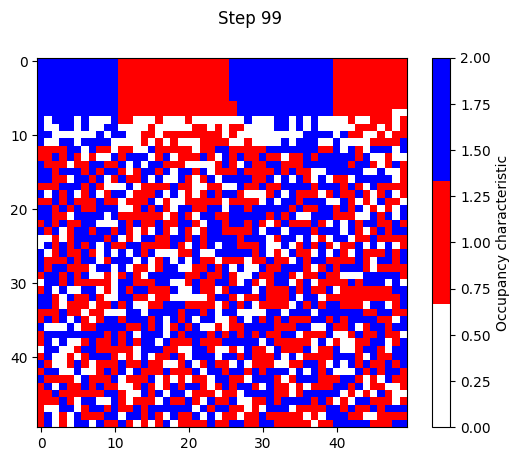

In [ ]:
# everyone's moving to the top left because that's where the search for a new house starts
from matplotlib import colors

cmap = colors.ListedColormap(['white', 'red', 'blue'])

tolerances = {1: 0.5, 2: 0.5}
radius = 4
n_steps = 100

fig, ax = plt.subplots()
fig.suptitle('Step 0')
img = plt.imshow(housing_grid, cmap=cmap)

cbar = fig.colorbar(img, ax=ax)
cbar.set_label('Occupancy characteristic')

for n in range(n_steps):
    one_step(housing_grid, tolerances, radius)

    img.set_array(housing_grid)
    fig.suptitle(f"Step {n}")
    plt.pause(0.1)
    clear_output(wait=True)
    display(fig)
